In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split

from sklearn.model_selection import cross_val_score,  GridSearchCV

import xgboost as xgb
import sklearn.preprocessing as pre

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer
from scipy.stats import skew
import scipy.stats as st

/Users/sergio/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
geo = pd.read_csv('areas.csv')

In [22]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [23]:
geo2 = geo.drop(['longitude', 'latitude'], axis=1)
areas2 = pd.DataFrame()
areas2['sub_area'] = train['sub_area']
train = train.set_index('sub_area').join(geo2.set_index('sub_area'))['distance']


sub_area
Ajeroport    2437.480994
Ajeroport    2437.480994
Ajeroport    2437.480994
Ajeroport    2437.480994
Ajeroport    2437.480994
Name: distance, dtype: float64

In [6]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (30471, 292)
Test data shape: (7662, 291)


In [7]:
train.price_doc.describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

Skew is: 4.47474487357


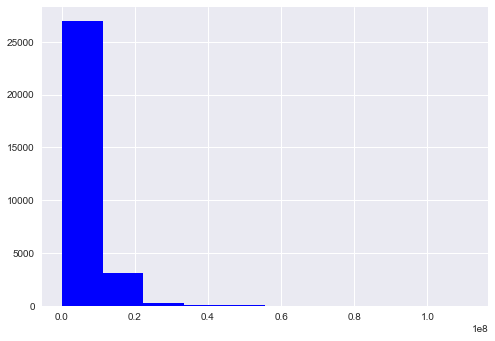

In [8]:
print ("Skew is:", train.price_doc.skew())
plt.hist(train.price_doc, color='blue')
plt.show()

Skew is: -0.686715679719


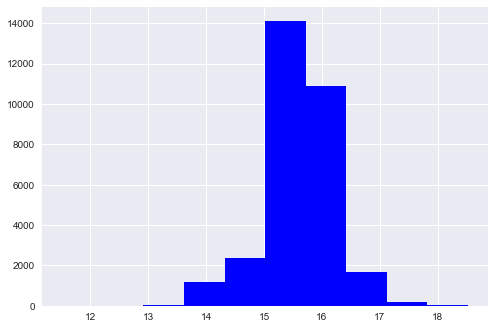

In [9]:
target = np.log(train.price_doc)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [10]:
numeric_features = train.select_dtypes(include=[np.number])

In [11]:
corr = numeric_features.corr()

print (corr['price_doc'].sort_values(ascending=False)[:5], '\n')
print (corr['price_doc'].sort_values(ascending=False)[-5:])

price_doc           1.000000
num_room            0.476337
full_sq             0.341840
sport_count_5000    0.294864
sport_count_3000    0.290651
Name: price_doc, dtype: float64 

ttk_km               -0.272620
bulvar_ring_km       -0.279158
kremlin_km           -0.279249
sadovoe_km           -0.283622
zd_vokzaly_avto_km   -0.284069
Name: price_doc, dtype: float64


In [12]:
room_pivot = train.pivot_table(index='num_room',
                                  values='price_doc', aggfunc=np.median)

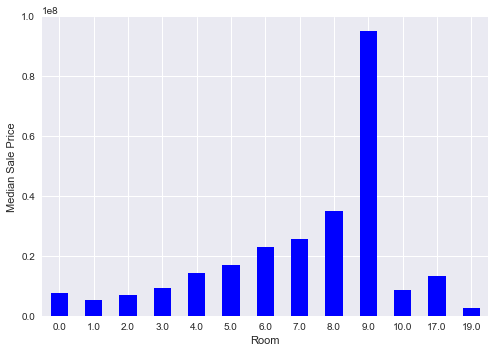

In [13]:
room_pivot.plot(kind='bar', color='blue')
plt.xlabel('Room')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

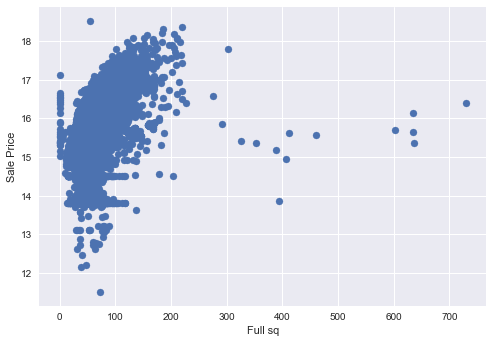

In [14]:
train = train[train['full_sq'] < 3000]
plt.scatter(x=train['full_sq'], y=np.log(train.price_doc))
plt.ylabel('Sale Price')
plt.xlabel('Full sq')
plt.show()

In [25]:
train['distance_from_kremlin'].isnull().sum()

30347

In [20]:
# geo = pd.read_csv('Longitud_Latitud.csv')

# from math import radians, cos, sin, asin, sqrt
# def haversine(lon1, lat1, lon2, lat2):
#     """
#     Calculate the great circle distance between two points 
#     on the earth (specified in decimal degrees)
#     """
#     # convert decimal degrees to radians 
#     lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
#     # haversine formula 
#     dlon = lon2 - lon1 
#     dlat = lat2 - lat1 
#     a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
#     c = 2 * asin(sqrt(a)) 
#     km = 6367 * c
#     return km

# def calc_distance(df):
#     kremlin = (37.617664,55.752121)
#     loc = (df['longitude'], df['latitude'])
#     return haversine(loc[0], loc[1], kremlin[0], kremlin[1])
# geo['distance'] = geo.apply(calc_distance, axis=1)